In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from sklearn.metrics import confusion_matrix,classification_report


In [3]:
(train_fx, train_fy), (test_fx, test_fy) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print(train_fx.shape, train_fy.shape, test_fx.shape, test_fy.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
# Reduce pixel values
train_fx, test_fx = train_fx / 255.0, test_fx / 255.0

In [6]:
# flatten the label values
# train_fy, test_fy = train_fy.flatten(), test_fy.flatten()

In [7]:
cnn = models.Sequential([
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Fit
history = cnn.fit(train_fx, train_fy, epochs=5, validation_data = (test_fx, test_fy))

Epoch 1/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8701 - accuracy: 0.6963 - val_loss: 0.9603 - val_accuracy: 0.6686
Epoch 2/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8291 - accuracy: 0.7105 - val_loss: 0.9233 - val_accuracy: 0.6872
Epoch 3/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7993 - accuracy: 0.7207 - val_loss: 0.9162 - val_accuracy: 0.6918
Epoch 4/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7685 - accuracy: 0.7315 - val_loss: 0.9181 - val_accuracy: 0.6886
Epoch 5/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7440 - accuracy: 0.7403 - val_loss: 0.9090 - val_accuracy: 0.6902
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7212 - accuracy: 0.7484 - val_loss: 0.9081 - val_accuracy: 0.6926
Epoch 7/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6956 - accuracy: 0.7568 - val_loss: 0.9055 -

In [17]:
cnn.evaluate(test_fx, test_fy)

313/313 [==============================] - 3s 11ms/step - loss: 1.0325 - accuracy: 0.6974


[1.0325065851211548, 0.6973999738693237]

In [18]:
pred_y = cnn.predict(test_fx)
pred_y_r = [np.argmax(element) for element in pred_y]

In [19]:
confusion = confusion_matrix(y_true=test_fy, y_pred=pred_y_r)
confusion

array([[749,  34,  49,  27,  15,   9,   8,  13,  55,  41],
       [ 23, 848,   7,   6,   7,   6,   5,   5,  21,  72],
       [ 71,   6, 564,  75,  93,  72,  47,  44,  15,  13],
       [ 39,  21,  64, 521,  73, 168,  42,  39,  15,  18],
       [ 19,   7,  78,  86, 647,  39,  25,  75,  14,  10],
       [ 14,   9,  45, 191,  42, 616,   9,  59,   7,   8],
       [  6,  11,  57,  80,  55,  30, 720,  11,  14,  16],
       [ 22,   7,  34,  50,  55,  62,   4, 750,   5,  11],
       [ 73,  39,  20,  25,   9,   6,   5,   8, 773,  42],
       [ 36,  94,   5,  17,   5,   4,   3,  20,  30, 786]])

In [20]:
classification = classification_report(test_fy,pred_y_r)
print(classification)

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1000
           1       0.79      0.85      0.82      1000
           2       0.61      0.56      0.59      1000
           3       0.48      0.52      0.50      1000
           4       0.65      0.65      0.65      1000
           5       0.61      0.62      0.61      1000
           6       0.83      0.72      0.77      1000
           7       0.73      0.75      0.74      1000
           8       0.81      0.77      0.79      1000
           9       0.77      0.79      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



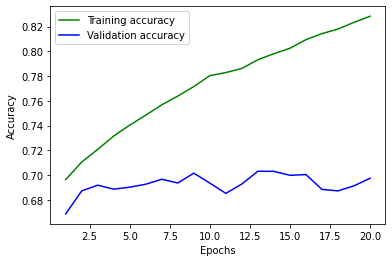

In [23]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])
